In [85]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [86]:
#Valores dinámicos
v=np.zeros(10000)
m=np.zeros(10000)
h=np.zeros(10000)
n=np.zeros(10000)
Ij=np.zeros(10000)

#Capacidad
c=1

#Potenciales de los diferentes canales
Vna=50
Vk=-77
Vl=-54.387

#Conductancia de los diferentes canales
gna=120
gk = 36
gl = 0.3

#Area de comportamiento (I/a para el futuro)
a=7.854*10**-3
In=(0.1)/a

#Condiciones iniciales
v0 = -65
m0 = 0.053
h0 = 0.6
n0 = 0.318

In [87]:
def alphaM(x):
  return (0.1*(-x-40))/(np.exp((-x-40)/10)-1)
def betaM(x):
  return 4*np.exp((-x-65)/18)

def alphaH(x):
  return 0.07*np.exp((-x-65)/20)
def betaH(x):
  return 1/(np.exp((-x-35)/10)+1)

def alphaN(x):
  return (0.01*(-x-55))/(np.exp((-x-55)/10)-1)
def betaN(x):
  return 0.125*np.exp((-x-65)/80)

In [88]:
(alphaM(v[210])*(1-m[210]) - betaM(v[210])*m[210])

4.074629441455096

In [89]:
h[210]

0.0

In [90]:
def HH(x):
  for i in range(0,x):
    if i==0:
      v[i]=v0
      m[i]=m0
      h[i]=h0
      n[i]=n0
    else:
      v[i]=v[i-1] + (10**-2)*((Ij[i-1] - gl*(v[i-1]-Vl) - gna*m[i-1]**3*h[i-1]*(v[i-1]-Vna) - gk*n[i-1]**4*(v[i-1]-Vk))/c)
      m[i]=m[i-1] + (10**-2)*(alphaM(v[i-1])*(1-m[i-1]) - betaM(v[i-1])*m[i-1])
      h[i]=h[i-1] + (10**-2)*(alphaH(v[i-1])*(1-h[i-1]) - betaH(v[i-1])*h[i-1])
      n[i]=n[i-1] + (10**-2)*(alphaN(v[i-1])*(1-n[i-1]) - betaN(v[i-1])*n[i-1])

### $I_{ext}=0$

In [91]:
Ij=np.zeros(10000)
HH(10000)

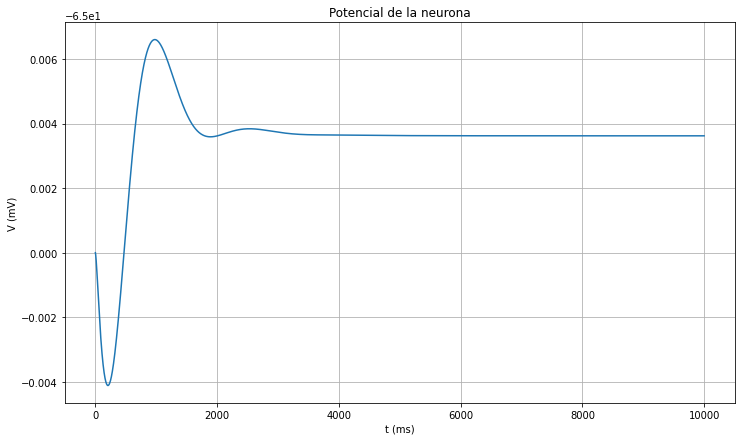

In [92]:
# Potencial de la neurona durante 100 ms
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

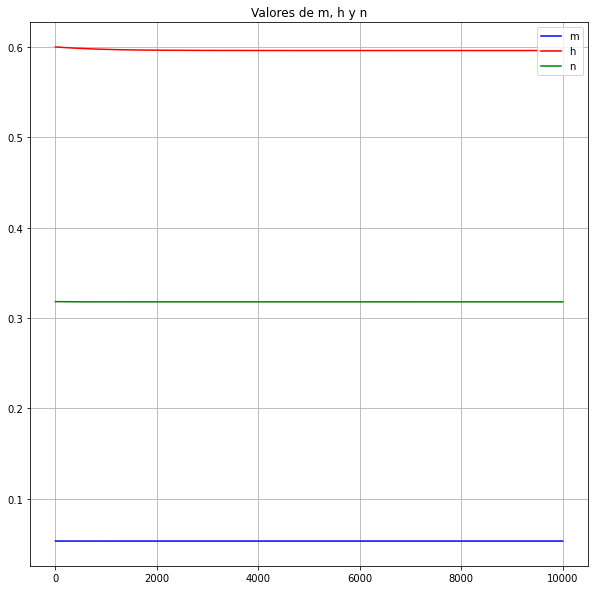

In [93]:
# Valores de m, n y h
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(range(0,10000), m,label="m",c="blue")
ax.plot(range(0,10000), h,label="h",c="red")
ax.plot(range(0,10000), n,label="n",c="green")
ax.set_title('Valores de m, h y n')
ax.legend()
plt.grid()

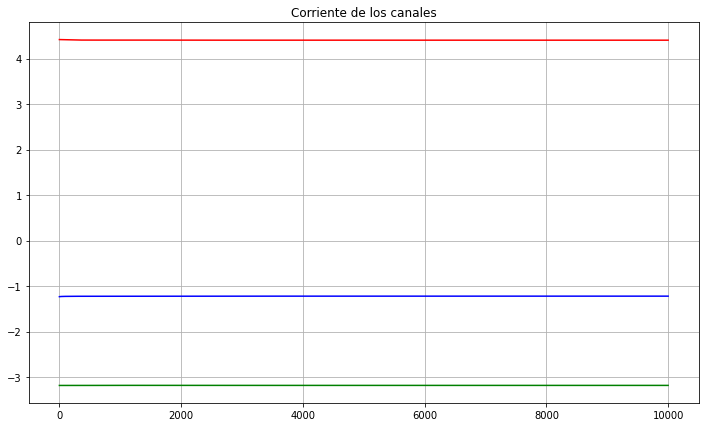

In [94]:
#Corriente en los canales de Na, K y L
ck= gk*n**4*(v-Vk)
cna= gna*m**3*h*(v-Vna)
cl=gl*(v-Vl)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), cna,label="Corriente Na",c="blue")
ax.plot(range(0,10000), ck,label="Corriente K",c="red")
ax.plot(range(0,10000), cl,label="Corriente L",c="green")
ax.set_title('Corriente de los canales')
plt.grid()

En la gráfica 1 se observa que el potencial de la membrana no varía practicamente nada y se acaba manteniendo en su valor estacianal durante todo el proceso, por lo que no se produce ningún potencial de acción. Esto se debe a que no hay flujo de corriente como se puede observar en la gráfica 3, a través de la membrana por ninguno de los canales y, por lo tanto, no hay cambios en los estados de activación o inactivación de los canales iónicos. En la gráfica 2, se observa que los valores n, h y m, que son las fracciones de los canales que estan activos o inactivos, los cuales no sufren ningún cambio en sus valores en ningún momento por lo que no se produce ningún flujo de iones. De base se encuentran todos los canales en sus valores estacionarios y no cambian en ningún momento por lo que se produce ningún tipo de flujo de iones y de potencial de acción.

### $I_{ext}=0.1\mu A$

In [95]:
Ij[:5000]=In
HH(10000)

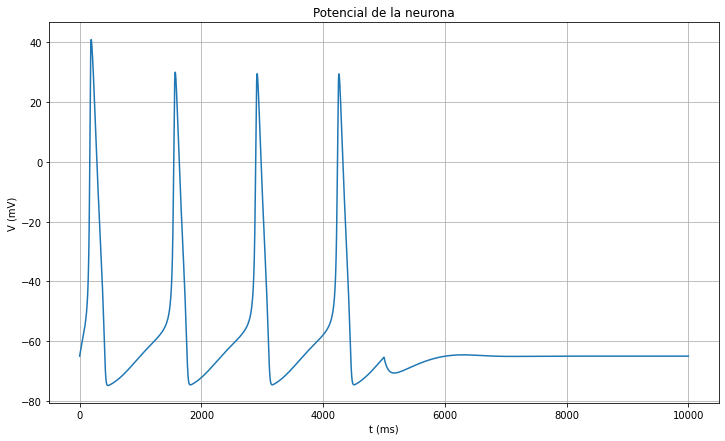

In [96]:
# Potencial de la neurona durante 100 ms
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona')
plt.grid()

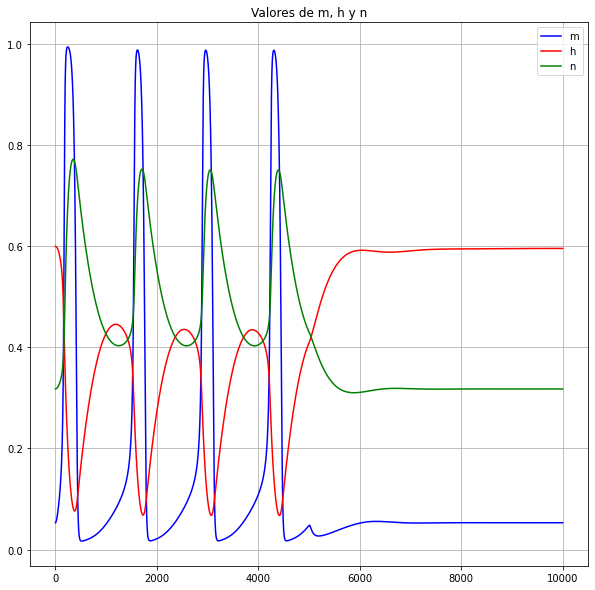

In [97]:
# Valores de m, n y h
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(range(0,10000), m,label="m",c="blue")
ax.plot(range(0,10000), h,label="h",c="red")
ax.plot(range(0,10000), n,label="n",c="green")
ax.set_title('Valores de m, h y n')
ax.legend()
plt.grid()

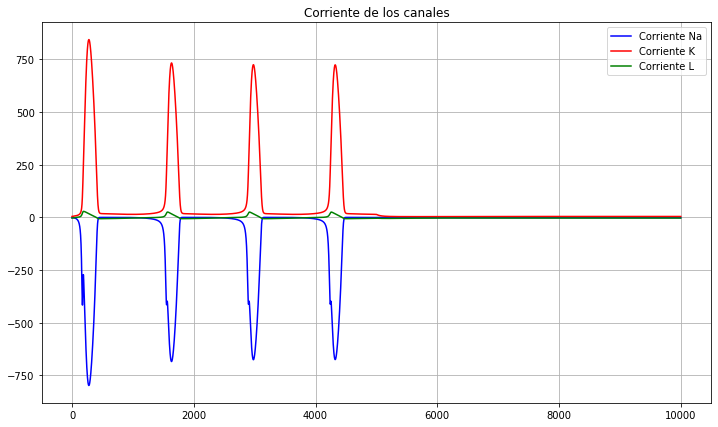

In [98]:
#Corriente en los canales de Na, K y L
ck= gk*n**4*(v-Vk)
cna= gna*m**3*h*(v-Vna)
cl=gl*(v-Vl)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), cna,label="Corriente Na",c="blue")
ax.plot(range(0,10000), ck,label="Corriente K",c="red")
ax.plot(range(0,10000), cl,label="Corriente L",c="green")
ax.set_title('Corriente de los canales')
ax.legend()
plt.grid()

En el gráfico 1 se observa que se produce 4 potenciales de acción durante los primeros 50 ms, que es cuando se le esta aplicando una corriente que produce que el potencial de la membrana cambie y se alcance los umbrales de activación de los canales de sodio y potasio. Luego cuando se deja de aplicar esa corriente la membrana vuelve a su valor estacional de forma constante haste la finalización del proceso. En esta sección de la practica se podrá observar mejor la relación entre los diferentes canales. 

En la gráfica 2, se puede observa como se activan y desactivan las fracciones de los iones, es decir los elementos n, h y m. Antes de todo, se va a aclarar que son estos tres elementos. 

Estos tres elementos se comportan como si fuesen puertas que se van abriendo o cerrando controlando la salida y entrada de iones. El canal del ión $K^+$ esta compuesta por cuatro puertas donde n representa la probabilidad de apertura de esos canales activados por voltaje. El canal de $Na^+$ esta compuesto por tres puertas donde m representa la probabilidad de apertura de esos canales activados por voltaje y por una puerta donde h representa la probabilidad de apertura de ese canal inactivado por el voltaje. Según los cambios en el valor del voltaje de la membrana por una corriente externa harán que estos elementos se vayan activando o desactivado permitiendo el flujo por los canales de los iones. 

Como ya se sabe se producen 4 potenciales de acción, en los que los canales se activaran dejando pasar a los iones y ocurriendo un proceso de desporalización y repolarización de la membrana.

Se observa que el canal más rapido en activarse es el de sodio, que es el que realiza el proceso de desporalización. Durante este momento, al activarse y siendo la concentración de iones de $Na^+$ mayor en el exterior empezaran a entrar iones de sodio a la membrana y esto hará que el potencial de la membrana sea más positivo. En ese momento se observa que el valor de m es alto y el de h bajo por lo que esto permitirá el flujo de los iones de sodio. 

Tras la apertura del canal de sodio se activará el canal de potasio. En este caso, al haber una concentración mayor en el interior de la membrana que en el exterior, empezarán a salir iones de $K^+$. Este proceso se llama repolarización y hace que el voltaje de la membrana baje y se cierre el canal de sodio, por lo que el valor de m se ira reduciendo y h aumentando cuando n tengo un valor alto. Como se observa en el gráfico el cierre del canal de sodio no ocurre cuando empieza a aumentar n, durante un periodo de tiempo (potencial de acción) el canal de sodio y potasio se matendrán activados manteniendo la despolarización.

Los límites de flujo en los canales estan limitados por la conductancia del canal lo cual se muestra en la gráfica 3. Este valor dependera de la diferencia potencial de la membrana y del canal y de la probabilidad de activarse o desactivarse del canal.

Por último, quedaría hablar del canal de Lick que se activa durante un corto periodo de tiempo cuando ocurre un potencial de acción y sirve para regularizar la exccitabilidad de la neurona.

Todo este proceso despolarización repolarización se producirá 4 veces, hasta que la intensidad vuelta a tener valor 0.